In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

In [1]:
train_dir = "dataset/train"
test_dir = "dataset/test"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values from [0, 255] to [0, 1]
    rotation_range=40,          # Rotate images up to 40 degrees
    width_shift_range=0.2,      # Shift width by 20%
    height_shift_range=0.2,     # Shift height by 20%
    shear_range=0.2,            # Shearing transformations
    zoom_range=0.2,             # Zoom in/out by 20%
    horizontal_flip=True,       # Flip images horizontally
    fill_mode='nearest')        # Fill missing pixels with nearest pixels


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),     # Resize all images to 150x150
    batch_size=32,
    class_mode='categorical')  

Found 251 images belonging to 3 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 66 images belonging to 3 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolution layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third convolution layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer (number of classes must match your dataset's classes)
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


C:\Users\tulasi\OneDrive\Documents\PythonScripts\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)


C:\Users\tulasi\OneDrive\Documents\PythonScripts\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3773 - loss: 4.6163

C:\Users\tulasi\OneDrive\Documents\PythonScripts\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3735 - loss: 4.4750 - val_accuracy: 0.1250 - val_loss: 1.1093
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3125 - loss: 1.0932 - val_accuracy: 0.0000e+00 - val_loss: 1.2324
Epoch 3/10


C:\Users\tulasi\OneDrive\Documents\PythonScripts\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4120 - loss: 1.0955 - val_accuracy: 0.2969 - val_loss: 1.1262
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5312 - loss: 1.0469 - val_accuracy: 0.0000e+00 - val_loss: 1.4122
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4385 - loss: 1.0620 - val_accuracy: 0.2188 - val_loss: 1.2175
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 1.0397 - val_accuracy: 0.0000e+00 - val_loss: 1.4381
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5371 - loss: 0.9553 - val_accuracy: 0.4531 - val_loss: 1.5676
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 0.9855 - val_accuracy: 0.5000 - val_loss: 1.6161
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6656 - loss: 0.7649 - val_accuracy: 0.2031 - val_loss: 2.0098
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.6100 - val_accuracy: 0.5000 - val_loss: 1.3541


In [11]:
model.save("cnn_custom_dataset_model.h5")


In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

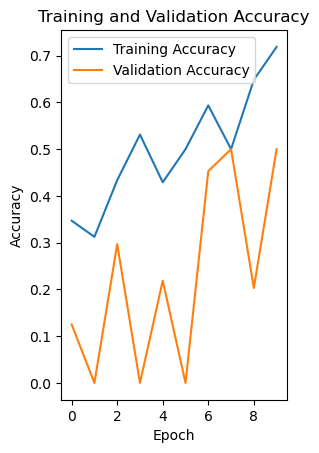

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

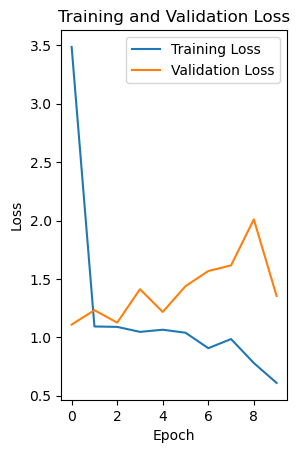

In [15]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.1075 - loss: 2.0545
Test accuracy: 0.12121212482452393


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Class: Type 1 disease
Prediction Confidence: 0.816135048866272


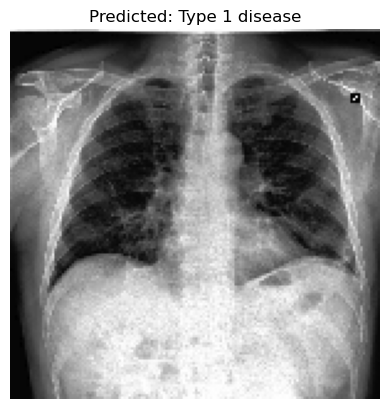

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = tf.keras.models.load_model("cnn_custom_dataset_model.h5")

# Path to the test image (no need to append 'test' folder again)
test_image_path = "C:/Users/tulasi/Downloads/project/dataset/test/Type 1 disease/0100.jpeg"
# Class labels (from the training generator)
class_labels = list(train_generator.class_indices.keys())

# Function to preprocess and predict for a single image
def predict_image(image_path):
    # Load the image
    img = image.load_img(image_path, target_size=(150, 150))  # Target size must match the training size
    img_array = image.img_to_array(img)                       # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)             # Add batch dimension
    img_array = img_array / 255.0                             # Rescale pixel values

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])         # Get index of the highest prediction score
    predicted_class = class_labels[predicted_class_index]     # Get the corresponding class label

    # Show prediction result
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Confidence: {predictions[0][predicted_class_index]}")
    
    # Display the image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Test the image
predict_image(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Class: Type 2 disease
Prediction Confidence: 0.675895094871521


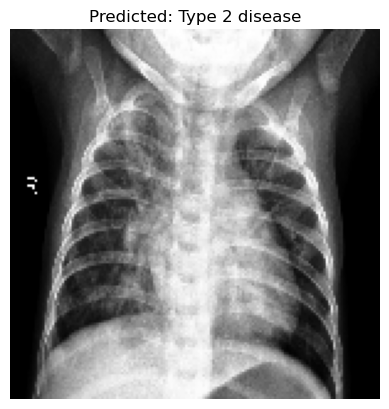

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = tf.keras.models.load_model("cnn_custom_dataset_model.h5")

# Path to the test image (no need to append 'test' folder again)
test_image_path = "C:/Users/tulasi/Downloads/project/dataset/test/Type 2 disease/0115.jpeg"
# Class labels (from the training generator)
class_labels = list(train_generator.class_indices.keys())

# Function to preprocess and predict for a single image
def predict_image(image_path):
    # Load the image
    img = image.load_img(image_path, target_size=(150, 150))  # Target size must match the training size
    img_array = image.img_to_array(img)                       # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)             # Add batch dimension
    img_array = img_array / 255.0                             # Rescale pixel values

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])         # Get index of the highest prediction score
    predicted_class = class_labels[predicted_class_index]     # Get the corresponding class label

    # Show prediction result
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Confidence: {predictions[0][predicted_class_index]}")
    
    # Display the image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Test the image
predict_image(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted Class: Healthy
Prediction Confidence: 0.5481768846511841


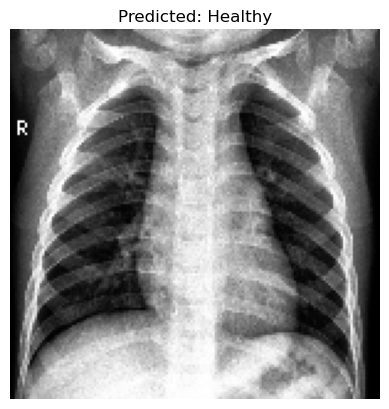

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = tf.keras.models.load_model("cnn_custom_dataset_model.h5")

# Path to the test image (no need to append 'test' folder again)
test_image_path = "C:/Users/tulasi/Downloads/project/dataset/test/healthy/0105.jpeg"
# Class labels (from the training generator)
class_labels = list(train_generator.class_indices.keys())

# Function to preprocess and predict for a single image
def predict_image(image_path):
    # Load the image
    img = image.load_img(image_path, target_size=(150, 150))  # Target size must match the training size
    img_array = image.img_to_array(img)                       # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)             # Add batch dimension
    img_array = img_array / 255.0                             # Rescale pixel values

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])         # Get index of the highest prediction score
    predicted_class = class_labels[predicted_class_index]     # Get the corresponding class label

    # Show prediction result
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Confidence: {predictions[0][predicted_class_index]}")
    
    # Display the image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# Test the image
predict_image(test_image_path)
